# Competition statements



The competition description:
- The competition consists on correctly classifing 5 kinds of flowers

The data description: 
- The dataset contains images of 5 classes 
- The dataset consists of 1863 images (1660 images for training and 203 images for test)

The general rules are:
- Participant fills the blanks '[FIXME]' to load dataset and build the suitable CNN model 
- Participant uses only the provided training and testing images to train the model and classify the test images
- Participant do not crawling the web in search of additional data for the target categories
- Participant should be in the mindset that this is the only data available for those categories
- Participant saves the trained model as 'his_name.h5'
- Participant saves the prediction results as 'his_name.csv'
- Participant saves the modified jupyter notebook as 'his_name.ipynb'
- Participant should do further modifications to the CNN model in order to enhance the classification performances 
- Participant saves, finally, "the model", "the csv file" and "the modified jupyter notebook" in one directory with his name and  send it to evaluators at this mail address "cis.tn@ieee.org"
- Participant how reaches the best accuracy value on test dataset is the winner


# Modules importation

In [1]:
import os, cv2, random
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models, optimizers
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
import matplotlib.pyplot as plt 
from random import shuffle
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split



Using TensorFlow backend.


# Data Preparation 

In [2]:
!git clone https://github.com/Sousouam/dataset.git

fatal: destination path 'dataset' already exists and is not an empty directory.


In [3]:
!ls

adc.json  dataset  drive  modelc.h5  model.h5  sample_data  subc.csv  test_data


In [ ]:
# Dataset paths 
TRAIN_DIR = './dataset/train/'

train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] 

In [ ]:
# Get the training subset 
def prepare_data_training(list_of_images):
    """
    Returns two arrays: 
        x is an array of images
        y is an array of labels
    """
    x = [] # images
    y = [] # labels
   
    for image in list_of_images:
        for img in os.listdir(image):
            imgs = cv2.imread(os.path.join(image, img))
            new_imgs = cv2.resize(imgs, dsize=(128,128))
            x.append(new_imgs)            
            
            if 'class5' in image:
                y.append(4)
            elif 'class4' in image:
                y.append(3)
            elif 'class3' in image:
                y.append(2)
            elif 'class2' in image:
                y.append(1)
            elif 'class1' in image:
                y.append(0)      
       
    img_cnt = len(y)
    shuffle_idxes = list(range(img_cnt))
    shuffle(shuffle_idxes)
    shuffle_imgs = list()
    shuffle_labels = list()
    for idx in shuffle_idxes:
        shuffle_imgs.append(x[idx])
        shuffle_labels.append(y[idx])
    x = np.array(shuffle_imgs)
    y = to_categorical(shuffle_labels)
    x = x.reshape(-1,128,128,3)
    x = x/255.0
    
    return x, y

In [6]:
# Getting the training images and their labels
X, Y = prepare_data_training(train_images)
print(X.shape)
print(Y.shape)

(1660, 128, 128, 3)
(1660, 5)


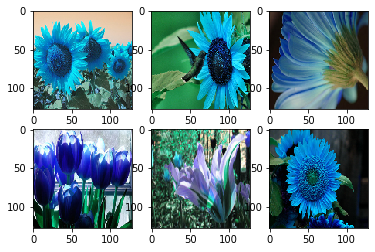

In [7]:
# Visualizing some images
figure,axe=plt.subplots(2,3)
for i in range(2):
    for j in range (3):
        l=random.randint(0,len(Y))
        axe[i,j].imshow(X[l])        

# Building the CNN Model 

In [8]:
# Initialising the CNN
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.layers.normalization import BatchNormalization
model = Sequential()
inputShape = (128, 128, 3)
chanDim = -1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation("softmax"))
# Compiling the CNN

# Printing the Model architecture
model.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 42, 42, 32)        0         
_____________________________

# Training the model 


In [ ]:
# Functions for visualizing the training parameters (loss and accuracy)
def loss_plot(fit_history):
    plt.figure(figsize=(18, 4))
    plt.plot(fit_history.history['loss'], label = 'train')
    plt.plot(fit_history.history['val_loss'], label = 'test')
    plt.legend()
    plt.title('Loss Function');
    
def accuracy_plot(fit_history):
    plt.figure(figsize=(18, 4))
    plt.plot(fit_history.history['acc'], label = 'train')
    plt.plot(fit_history.history['val_acc'], label = 'test')
    plt.legend()
    plt.title('Accuracy');

In [ ]:
EPOCHS = 1
INIT_LR = 0.0001
BS = 20
#default_image_size = tuple((256, 256))
image_size = 0

width=256
height=256
depth=3
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics= ['accuracy'])


In [ ]:
X,y=prepare_data_training(train_images)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 

Epoch 1/1
66/66 [==============================] - 5s 78ms/step - loss: 0.1282 - acc: 0.9468 - val_loss: 0.1747 - val_acc: 0.9446


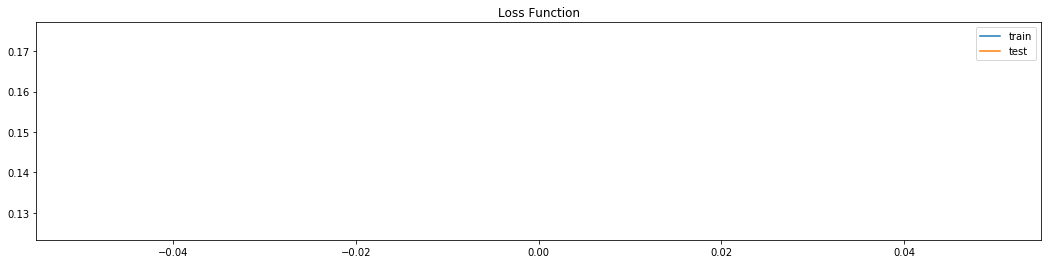

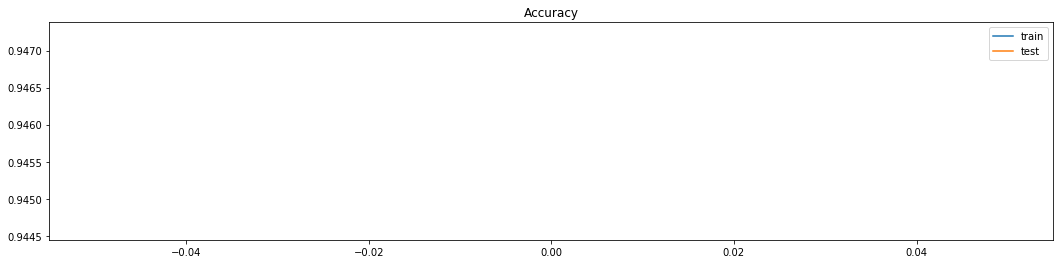

In [75]:
# Fitting the model 
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")
model_history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )
loss_plot(model_history)
accuracy_plot(model_history)


In [45]:
1e-3

0.001

In [ ]:

#saving the model 
model.save("final_model.h5")

In [ ]:
from google.colab import files 
files.download('final_model.h5')

# Testing the model

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [81]:
model_file = drive.CreateFile({'title' : 'final_model.h5'})
model_file.SetContentFile('final_model.h5')
model_file.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1oG4zWXXaUvi8FsYRv6RbmAq8l0gIuHYO'})

In [33]:
#loading test data 
!git clone https://github.com/Sousouam/test_data.git

fatal: destination path 'test_data' already exists and is not an empty directory.


In [ ]:
# Test dataset paths 
TEST_DIR = './test_data/test/'

test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [ ]:
# Get the testing subset 
def prepare_data_test(list_of_images):  
    x = [] # images as arrays
    ids = [] # images ids   
    for image in list_of_images:  
        imgs = cv2.imread(image)
        new_imgs = cv2.resize(imgs, dsize=(128,128))
        x.append(new_imgs)
        ids.append(image.split(".")[1][-4:])
        
    x = np.array(x).reshape(-1,128,128,3)
    x = x/255.0
    return x, ids

In [59]:
# Getting the test images and their ids
X_test, id_img = prepare_data_test(test_images)
print(X_test.shape)

(203, 128, 128, 3)


In [ ]:
# Making predictions
prediction= model.predict(X_test)

In [ ]:
# Preparing the CSV file for Submission 
predicted_val = [p.argmax() for p in prediction]
submission_df = pd.DataFrame({'id':id_img, 'label':predicted_val})
submission_df.to_csv("final_sub.csv", index=False)

# Downloading the result files

In [ ]:
from google.colab import files 
#files.download('your_name.h5')
files.download('final_sub.csv')